In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [28]:
dataset = pd.read_csv('AAPL.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [29]:
dataset.shape

(10409, 7)

In [30]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10409.000000,10409.000000,10409.000000,10409.000000,10409.000000,1.040900e+04
mean,13.959910,14.111936,13.809163,13.966757,13.350337,3.321778e+08
std,30.169244,30.514878,29.835055,30.191696,29.911132,3.393344e+08
min,0.049665,0.049665,0.049107,0.049107,0.038384,0.000000e+00
25%,0.281964,0.287946,0.274554,0.281250,0.234799,1.247604e+08
50%,0.468750,0.477679,0.459821,0.468750,0.386853,2.199680e+08
75%,14.217857,14.364286,14.043571,14.206071,12.188149,4.126108e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,7.421641e+09


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10409 non-null  object 
 1   Open       10409 non-null  float64
 2   High       10409 non-null  float64
 3   Low        10409 non-null  float64
 4   Close      10409 non-null  float64
 5   Adj Close  10409 non-null  float64
 6   Volume     10409 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 569.4+ KB


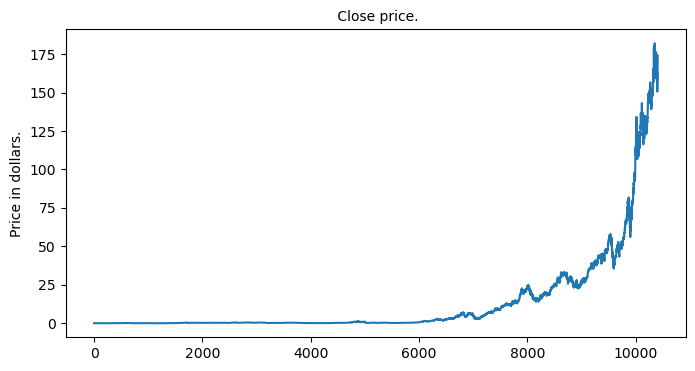

In [32]:
plt.figure(figsize=(8,4))
plt.plot(dataset['Close'])
plt.title(' Close price.', fontsize=10)
plt.ylabel('Price in dollars.')
plt.show()

In [33]:
dataset[dataset['Close'] == dataset['Adj Close']].shape

(34, 7)

In [34]:
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

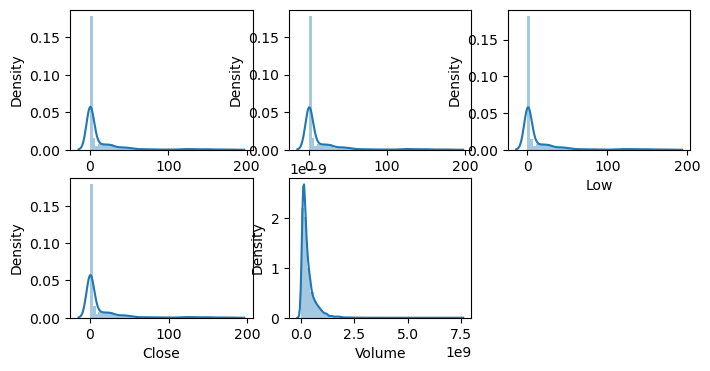

In [35]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(8,4))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(dataset[col])
plt.show()

In [40]:
futureDays = 25

In [42]:
dataset["Prediction"] = dataset[["Close"]].shift(-futureDays)
print(dataset.head())
print(dataset.tail())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100323  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.095089  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.088110  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090291   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092908   73449600   

   Prediction  
0    0.142299  
1    0.145089  
2    0.146763  
3    0.146205  
4    0.143973  
             Date        Open        High         Low       Close   Adj Close  \
10404  2022-03-18  160.509995  164.479996  159.759995  163.979996  163.979996   
10405  2022-03-21  163.509995  166.350006  163.009995  165.380005  165.380005   
10406  2022-03-22  165.509995  169.419998  164.910004  168.820007  168.820007   
10407  2022-03-23  167.990005  172.639999  167.649994  170.210007  170.210007   
10408  2022-03-24  171.0

In [43]:
x = np.array(dataset.drop(["Prediction"], 1))[:-futureDays]
print(x)

[['1980-12-12' 0.128348 0.128906 ... 0.128348 0.100323 469033600]
 ['1980-12-15' 0.12221 0.12221 ... 0.121652 0.095089 175884800]
 ['1980-12-16' 0.113281 0.113281 ... 0.112723 0.08811 105728000]
 ...
 ['2022-02-14' 167.369995 169.580002 ... 168.880005 168.880005 86185500]
 ['2022-02-15' 170.970001 172.949997 ... 172.789993 172.789993 62527400]
 ['2022-02-16' 171.850006 173.339996 ... 172.550003 172.550003 61177400]]


In [45]:
y = np.array(dataset.drop(["Prediction"], 1))[:-futureDays]
print(y)

[['1980-12-12' 0.128348 0.128906 ... 0.128348 0.100323 469033600]
 ['1980-12-15' 0.12221 0.12221 ... 0.121652 0.095089 175884800]
 ['1980-12-16' 0.113281 0.113281 ... 0.112723 0.08811 105728000]
 ...
 ['2022-02-14' 167.369995 169.580002 ... 168.880005 168.880005 86185500]
 ['2022-02-15' 170.970001 172.949997 ... 172.789993 172.789993 62527400]
 ['2022-02-16' 171.850006 173.339996 ... 172.550003 172.550003 61177400]]


In [46]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25)

In [48]:
xfuture = dataset.drop(["Prediction"], 1)[:-futureDays]
xfuture = xfuture.tail(futureDays)
xfuture = np.array(xfuture)
print(xfuture)

[['2022-01-12' 176.119995 177.179993 174.820007 175.529999 175.306641
  74805200]
 ['2022-01-13' 175.779999 176.619995 171.789993 172.190002 171.970901
  84505800]
 ['2022-01-14' 171.339996 173.779999 171.089996 173.070007 172.849792
  80440800]
 ['2022-01-18' 171.509995 172.539993 169.410004 169.800003 169.583939
  90956700]
 ['2022-01-19' 170.0 171.080002 165.940002 166.229996 166.018478 94815000]
 ['2022-01-20' 166.979996 169.679993 164.179993 164.509995 164.300659
  91420500]
 ['2022-01-21' 164.419998 166.330002 162.300003 162.410004 162.203354
  122848900]
 ['2022-01-24' 160.020004 162.300003 154.699997 161.619995 161.414337
  162294600]
 ['2022-01-25' 158.979996 162.759995 157.020004 159.779999 159.576691
  115798400]
 ['2022-01-26' 163.5 164.389999 157.820007 159.690002 159.486801
  108275300]
 ['2022-01-27' 162.449997 163.839996 158.279999 159.220001 159.01741
  121954600]
 ['2022-01-28' 165.710007 170.350006 162.800003 170.330002 170.113266
  179935700]
 ['2022-01-31' 170.1600